In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font',size=12)
sns.set(style='white')
sns.set(style='whitegrid',color_codes=True)
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor)
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.ensemble import VotingRegressor
from scipy import stats
from scipy.stats import zscore
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import KMeans
from sklearn.utils import resample

In [2]:
concrete_df=pd.read_csv('concrete.csv')

In [3]:
concrete_df.head(10)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
5,255.0,0.0,0.0,192.0,0.0,889.8,945.0,90,21.86
6,166.8,250.2,0.0,203.5,0.0,975.6,692.6,7,15.75
7,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,56,36.64
8,296.0,0.0,0.0,192.0,0.0,1085.0,765.0,28,21.65
9,155.0,184.0,143.0,194.0,9.0,880.0,699.0,28,28.99


In [4]:
concrete_df.tail()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06
1029,540.0,0.0,0.0,173.0,0.0,1125.0,613.0,7,52.61


In [5]:
#Exploratory data quality report

In [6]:
#univariant Analysis

In [7]:
concrete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [8]:
concrete_df.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

In [9]:
concrete_df.shape

(1030, 9)

In [10]:
concrete_df.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

In [11]:
concrete_df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [12]:
# We can see that cement,slag,ash are left skewed

In [13]:
print('Range of values: ', concrete_df['cement'].max()-concrete_df['cement'].min())

Range of values:  438.0


In [14]:
print('Minimum age: ', concrete_df['cement'].min())
print('Maximum age: ',concrete_df['cement'].max())
print('Mean value: ', concrete_df['cement'].mean())
print('Median value: ',concrete_df['cement'].median())
print('Standard deviation: ', concrete_df['cement'].std())

Minimum age:  102.0
Maximum age:  540.0
Mean value:  281.1678640776698
Median value:  272.9
Standard deviation:  104.50636449481536


In [15]:
Q1=concrete_df['cement'].quantile(q=0.25)
Q3=concrete_df['cement'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(concrete_df['cement']))

1st Quartile (Q1) is:  192.375
3st Quartile (Q3) is:  350.0
Interquartile range (IQR) is  157.625


In [16]:
# Outlier detection from Interquartile range (IQR) in original data
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in cement: ', L_outliers)
print('Upper outliers in cement: ', U_outliers)

Lower outliers in cement:  -44.0625
Upper outliers in cement:  586.4375


In [17]:
print('Number of outliers in cement upper : ', concrete_df[concrete_df['cement']>586.4375]['cement'].count())
print('Number of outliers in cement lower : ', concrete_df[concrete_df['cement']<-44.0625]['cement'].count())
print('% of Outlier in cement upper: ',round(concrete_df[concrete_df['cement']>586.4375]['cement'].count()*100/len(concrete_df)), '%')
print('% of Outlier in cement lower: ',round(concrete_df[concrete_df['cement']<-44.0625]['cement'].count()*100/len(concrete_df)), '%')

Number of outliers in cement upper :  0
Number of outliers in cement lower :  0
% of Outlier in cement upper:  0.0 %
% of Outlier in cement lower:  0.0 %


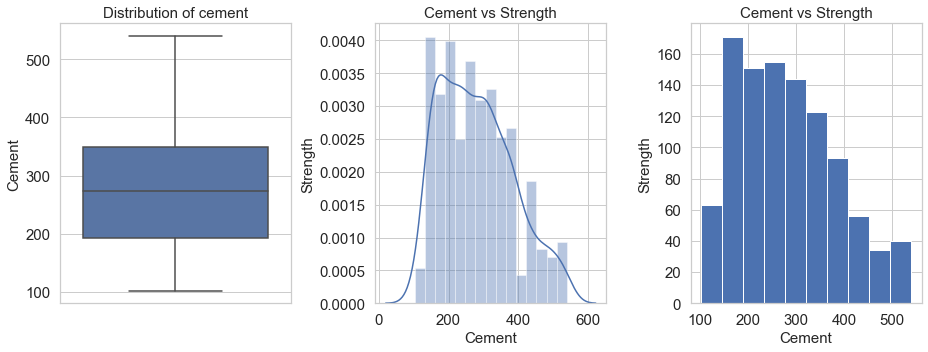

In [18]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='cement',data=concrete_df,orient='v',ax=ax1)
ax1.set_ylabel('Cement', fontsize=15)
ax1.set_title('Distribution of cement', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(concrete_df['cement'],ax=ax2)
ax2.set_xlabel('Cement', fontsize=15)
ax2.set_ylabel('Strength', fontsize=15)
ax2.set_title('Cement vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(concrete_df['cement'])
ax3.set_xlabel('Cement', fontsize=15)
ax3.set_ylabel('Strength', fontsize=15)
ax3.set_title('Cement vs Strength', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

In [19]:
print('Range of values: ', concrete_df['slag'].max()-concrete_df['slag'].min())

Range of values:  359.4


In [20]:
print('Minimum slag: ', concrete_df['slag'].min())
print('Maximum slag: ',concrete_df['slag'].max())
print('Mean value: ', concrete_df['slag'].mean())
print('Median value: ',concrete_df['slag'].median())
print('Standard deviation: ', concrete_df['slag'].std())
print('Null values: ',concrete_df['slag'].isnull().any())

Minimum slag:  0.0
Maximum slag:  359.4
Mean value:  73.89582524271844
Median value:  22.0
Standard deviation:  86.2793417481054
Null values:  False


In [21]:
Q1=concrete_df['slag'].quantile(q=0.25)
Q3=concrete_df['slag'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(concrete_df['slag']))

1st Quartile (Q1) is:  0.0
3st Quartile (Q3) is:  142.95
Interquartile range (IQR) is  142.95


In [22]:
# Outlier detection from Interquartile range (IQR) in original data
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in slag: ', L_outliers)
print('Upper outliers in slag: ', U_outliers)

Lower outliers in slag:  -214.42499999999998
Upper outliers in slag:  357.375


In [23]:
print('Number of outliers in slag upper : ', concrete_df[concrete_df['slag']>357.375]['slag'].count())
print('Number of outliers in slag lower : ', concrete_df[concrete_df['slag']<-214.425]['slag'].count())
print('% of Outlier in slag upper: ',round(concrete_df[concrete_df['slag']>357.375]['slag'].count()*100/len(concrete_df)), '%')
print('% of Outlier in slag lower: ',round(concrete_df[concrete_df['slag']<-214.425]['slag'].count()*100/len(concrete_df)), '%')

Number of outliers in slag upper :  2
Number of outliers in slag lower :  0
% of Outlier in slag upper:  0.0 %
% of Outlier in slag lower:  0.0 %


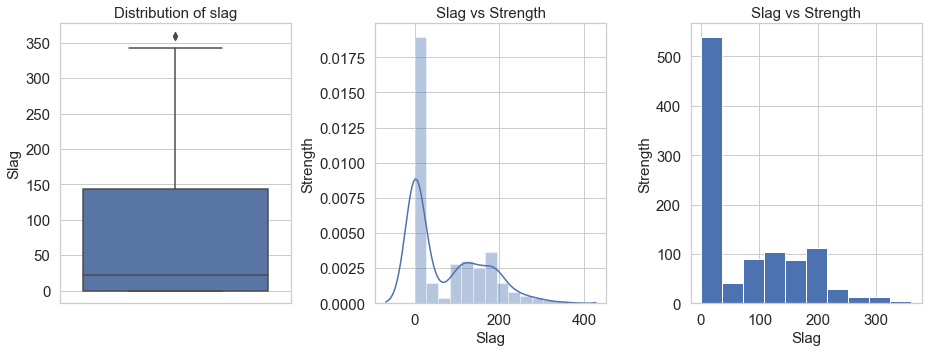

In [24]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='slag',data=concrete_df,orient='v',ax=ax1)
ax1.set_ylabel('Slag', fontsize=15)
ax1.set_title('Distribution of slag', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(concrete_df['slag'],ax=ax2)
ax2.set_xlabel('Slag', fontsize=15)
ax2.set_ylabel('Strength', fontsize=15)
ax2.set_title('Slag vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(concrete_df['slag'])
ax3.set_xlabel('Slag', fontsize=15)
ax3.set_ylabel('Strength', fontsize=15)
ax3.set_title('Slag vs Strength', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

In [25]:
## Ash
print('Range of values: ', concrete_df['ash'].max()-concrete_df['ash'].min())

Range of values:  200.1


In [26]:
print('Minimum ash: ', concrete_df['ash'].min())
print('Maximum ash: ',concrete_df['ash'].max())
print('Mean value: ', concrete_df['ash'].mean())
print('Median value: ',concrete_df['ash'].median())
print('Standard deviation: ', concrete_df['ash'].std())

Minimum ash:  0.0
Maximum ash:  200.1
Mean value:  54.188349514563086
Median value:  0.0
Standard deviation:  63.99700415268794


In [27]:
Q1=concrete_df['ash'].quantile(q=0.25)
Q3=concrete_df['ash'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(concrete_df['ash']))

1st Quartile (Q1) is:  0.0
3st Quartile (Q3) is:  118.3
Interquartile range (IQR) is  118.3


In [28]:
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in ash: ', L_outliers)
print('Upper outliers in ash: ', U_outliers)

Lower outliers in ash:  -177.45
Upper outliers in ash:  295.75


In [29]:
print('Number of outliers in ash upper : ', concrete_df[concrete_df['ash']>295.75]['ash'].count())
print('Number of outliers in ash lower : ', concrete_df[concrete_df['ash']<-177.45]['ash'].count())
print('% of Outlier in ash upper: ',round(concrete_df[concrete_df['ash']>295.75]['ash'].count()*100/len(concrete_df)), '%')
print('% of Outlier in ash lower: ',round(concrete_df[concrete_df['ash']<-177.45]['ash'].count()*100/len(concrete_df)), '%')

Number of outliers in ash upper :  0
Number of outliers in ash lower :  0
% of Outlier in ash upper:  0.0 %
% of Outlier in ash lower:  0.0 %


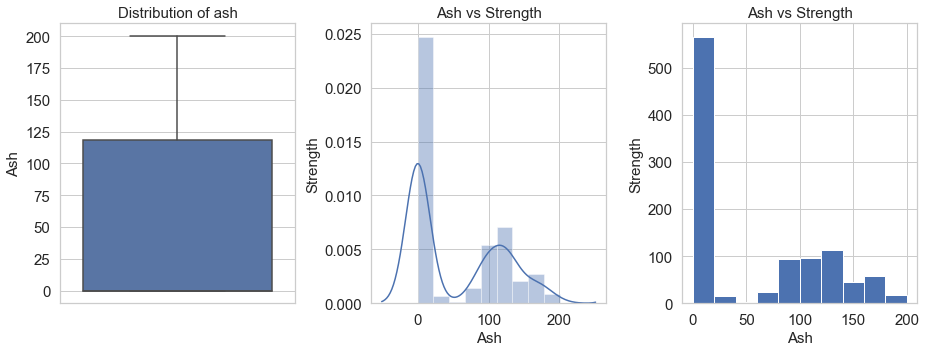

In [30]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='ash',data=concrete_df,orient='v',ax=ax1)
ax1.set_ylabel('Ash', fontsize=15)
ax1.set_title('Distribution of ash', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(concrete_df['ash'],ax=ax2)
ax2.set_xlabel('Ash', fontsize=15)
ax2.set_ylabel('Strength', fontsize=15)
ax2.set_title('Ash vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(concrete_df['ash'])
ax3.set_xlabel('Ash', fontsize=15)
ax3.set_ylabel('Strength', fontsize=15)
ax3.set_title('Ash vs Strength', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

In [31]:
## water
print('Range of values: ', concrete_df['water'].max()-concrete_df['water'].min())

Range of values:  125.2


In [32]:
print('Minimum water: ', concrete_df['water'].min())
print('Maximum water: ',concrete_df['water'].max())
print('Mean value: ', concrete_df['water'].mean())
print('Median value: ',concrete_df['water'].median())
print('Standard deviation: ', concrete_df['water'].std())
print('Null values: ',concrete_df['water'].isnull().any())

Minimum water:  121.8
Maximum water:  247.0
Mean value:  181.56728155339798
Median value:  185.0
Standard deviation:  21.35421856503245
Null values:  False


In [33]:
Q1=concrete_df['water'].quantile(q=0.25)
Q3=concrete_df['water'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(concrete_df['water']))

1st Quartile (Q1) is:  164.9
3st Quartile (Q3) is:  192.0
Interquartile range (IQR) is  27.099999999999994


In [34]:
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in water: ', L_outliers)
print('Upper outliers in water: ', U_outliers)

Lower outliers in water:  124.25000000000001
Upper outliers in water:  232.64999999999998


In [35]:
print('Number of outliers in water upper : ', concrete_df[concrete_df['water']>232.65]['water'].count())
print('Number of outliers in water lower : ', concrete_df[concrete_df['water']<124.25]['water'].count())
print('% of Outlier in water upper: ',round(concrete_df[concrete_df['water']>232.65]['water'].count()*100/len(concrete_df)), '%')
print('% of Outlier in water lower: ',round(concrete_df[concrete_df['water']<124.25]['water'].count()*100/len(concrete_df)), '%')

Number of outliers in water upper :  4
Number of outliers in water lower :  5
% of Outlier in water upper:  0.0 %
% of Outlier in water lower:  0.0 %


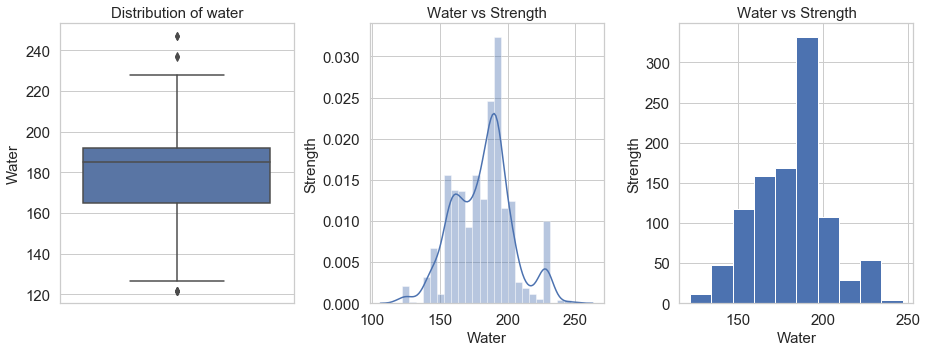

In [36]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='water',data=concrete_df,orient='v',ax=ax1)
ax1.set_ylabel('Water', fontsize=15)
ax1.set_title('Distribution of water', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(concrete_df['water'],ax=ax2)
ax2.set_xlabel('Water', fontsize=15)
ax2.set_ylabel('Strength', fontsize=15)
ax2.set_title('Water vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(concrete_df['water'])
ax3.set_xlabel('Water', fontsize=15)
ax3.set_ylabel('Strength', fontsize=15)
ax3.set_title('Water vs Strength', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

In [37]:
## super plastic

In [38]:
print('Range of values: ', concrete_df['superplastic'].max()-concrete_df['superplastic'].min())

Range of values:  32.2


In [39]:
print('Minimum superplastic: ', concrete_df['superplastic'].min())
print('Maximum superplastic: ',concrete_df['superplastic'].max())
print('Mean value: ', concrete_df['superplastic'].mean())
print('Median value: ',concrete_df['superplastic'].median())
print('Standard deviation: ', concrete_df['superplastic'].std())
print('Null values: ',concrete_df['superplastic'].isnull().any())

Minimum superplastic:  0.0
Maximum superplastic:  32.2
Mean value:  6.204660194174756
Median value:  6.4
Standard deviation:  5.973841392485508
Null values:  False


In [40]:
Q1=concrete_df['superplastic'].quantile(q=0.25)
Q3=concrete_df['superplastic'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(concrete_df['superplastic']))

1st Quartile (Q1) is:  0.0
3st Quartile (Q3) is:  10.2
Interquartile range (IQR) is  10.2


In [41]:
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in superplastic: ', L_outliers)
print('Upper outliers in superplastic: ', U_outliers)

Lower outliers in superplastic:  -15.299999999999999
Upper outliers in superplastic:  25.5


In [42]:
print('Number of outliers in superplastic upper : ', concrete_df[concrete_df['superplastic']>25.5]['superplastic'].count())
print('Number of outliers in superplastic lower : ', concrete_df[concrete_df['superplastic']<-15.3]['superplastic'].count())
print('% of Outlier in superplastic upper: ',round(concrete_df[concrete_df['superplastic']>25.5]['superplastic'].count()*100/len(concrete_df)), '%')
print('% of Outlier in superplastic lower: ',round(concrete_df[concrete_df['superplastic']<-15.3]['superplastic'].count()*100/len(concrete_df)), '%')

Number of outliers in superplastic upper :  10
Number of outliers in superplastic lower :  0
% of Outlier in superplastic upper:  1.0 %
% of Outlier in superplastic lower:  0.0 %


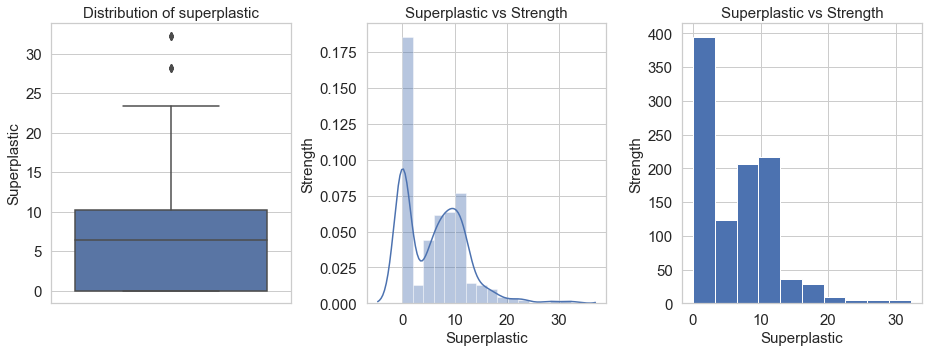

In [43]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='superplastic',data=concrete_df,orient='v',ax=ax1)
ax1.set_ylabel('Superplastic', fontsize=15)
ax1.set_title('Distribution of superplastic', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(concrete_df['superplastic'],ax=ax2)
ax2.set_xlabel('Superplastic', fontsize=15)
ax2.set_ylabel('Strength', fontsize=15)
ax2.set_title('Superplastic vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(concrete_df['superplastic'])
ax3.set_xlabel('Superplastic', fontsize=15)
ax3.set_ylabel('Strength', fontsize=15)
ax3.set_title('Superplastic vs Strength', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

In [44]:
## Coarseagg
print('Range of values: ', concrete_df['coarseagg'].max()-concrete_df['coarseagg'].min())

Range of values:  344.0


In [45]:
print('Minimum value: ', concrete_df['coarseagg'].min())
print('Maximum value: ',concrete_df['coarseagg'].max())
print('Mean value: ', concrete_df['coarseagg'].mean())
print('Median value: ',concrete_df['coarseagg'].median())
print('Standard deviation: ', concrete_df['coarseagg'].std())
print('Null values: ',concrete_df['coarseagg'].isnull().any())

Minimum value:  801.0
Maximum value:  1145.0
Mean value:  972.918932038835
Median value:  968.0
Standard deviation:  77.75395396672087
Null values:  False


In [46]:
Q1=concrete_df['coarseagg'].quantile(q=0.25)
Q3=concrete_df['coarseagg'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(concrete_df['coarseagg']))

1st Quartile (Q1) is:  932.0
3st Quartile (Q3) is:  1029.4
Interquartile range (IQR) is  97.40000000000009


In [47]:
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in coarseagg: ', L_outliers)
print('Upper outliers in coarseagg: ', U_outliers)

Lower outliers in coarseagg:  785.8999999999999
Upper outliers in coarseagg:  1175.5000000000002


In [48]:
print('Number of outliers in coarseagg upper : ', concrete_df[concrete_df['coarseagg']>1175.5]['coarseagg'].count())
print('Number of outliers in coarseagg lower : ', concrete_df[concrete_df['coarseagg']<785.9]['coarseagg'].count())
print('% of Outlier in coarseagg upper: ',round(concrete_df[concrete_df['coarseagg']>1175.5]['coarseagg'].count()*100/len(concrete_df)), '%')
print('% of Outlier in coarseagg lower: ',round(concrete_df[concrete_df['coarseagg']<785.9]['coarseagg'].count()*100/len(concrete_df)), '%')

Number of outliers in coarseagg upper :  0
Number of outliers in coarseagg lower :  0
% of Outlier in coarseagg upper:  0.0 %
% of Outlier in coarseagg lower:  0.0 %


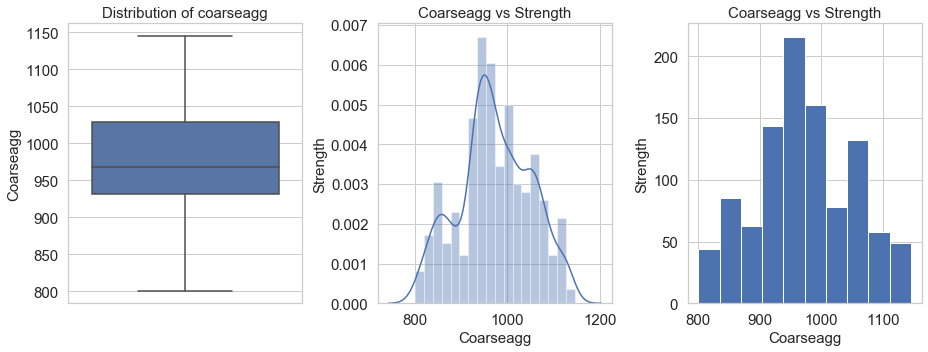

In [49]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='coarseagg',data=concrete_df,orient='v',ax=ax1)
ax1.set_ylabel('Coarseagg', fontsize=15)
ax1.set_title('Distribution of coarseagg', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(concrete_df['coarseagg'],ax=ax2)
ax2.set_xlabel('Coarseagg', fontsize=15)
ax2.set_ylabel('Strength', fontsize=15)
ax2.set_title('Coarseagg vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(concrete_df['coarseagg'])
ax3.set_xlabel('Coarseagg', fontsize=15)
ax3.set_ylabel('Strength', fontsize=15)
ax3.set_title('Coarseagg vs Strength', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

In [50]:
## Fineagg

In [51]:
print('Range of values: ', concrete_df['fineagg'].max()-concrete_df['fineagg'].min())

Range of values:  398.6


In [52]:
print('Minimum value: ', concrete_df['fineagg'].min())
print('Maximum value: ',concrete_df['fineagg'].max())
print('Mean value: ', concrete_df['fineagg'].mean())
print('Median value: ',concrete_df['fineagg'].median())
print('Standard deviation: ', concrete_df['fineagg'].std())
print('Null values: ',concrete_df['fineagg'].isnull().any())

Minimum value:  594.0
Maximum value:  992.6
Mean value:  773.5804854368932
Median value:  779.5
Standard deviation:  80.17598014240443
Null values:  False


In [53]:
Q1=concrete_df['fineagg'].quantile(q=0.25)
Q3=concrete_df['fineagg'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(concrete_df['fineagg']))

1st Quartile (Q1) is:  730.9499999999999
3st Quartile (Q3) is:  824.0
Interquartile range (IQR) is  93.05000000000007


In [54]:
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in fineagg: ', L_outliers)
print('Upper outliers in fineagg: ', U_outliers)

Lower outliers in fineagg:  591.3749999999998
Upper outliers in fineagg:  963.575


In [55]:
print('Number of outliers in fineagg upper : ', concrete_df[concrete_df['fineagg']>963.575]['fineagg'].count())
print('Number of outliers in fineagg lower : ', concrete_df[concrete_df['fineagg']<591.37]['fineagg'].count())
print('% of Outlier in fineagg upper: ',round(concrete_df[concrete_df['fineagg']>963.575]['fineagg'].count()*100/len(concrete_df)), '%')
print('% of Outlier in fineagg lower: ',round(concrete_df[concrete_df['fineagg']<591.37]['fineagg'].count()*100/len(concrete_df)), '%')

Number of outliers in fineagg upper :  5
Number of outliers in fineagg lower :  0
% of Outlier in fineagg upper:  0.0 %
% of Outlier in fineagg lower:  0.0 %


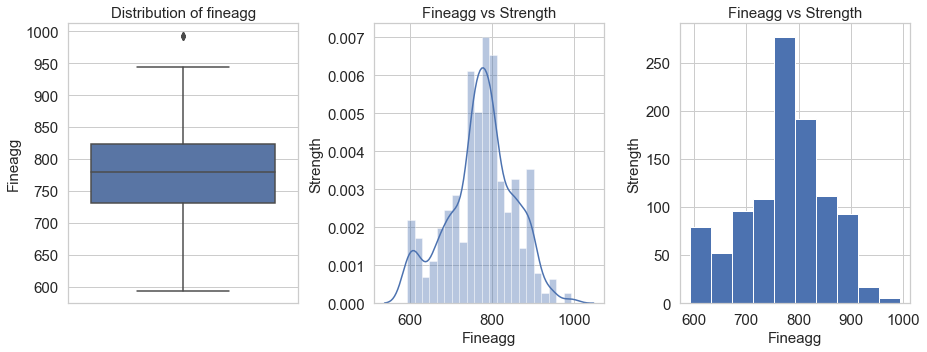

In [56]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='fineagg',data=concrete_df,orient='v',ax=ax1)
ax1.set_ylabel('Fineagg', fontsize=15)
ax1.set_title('Distribution of fineagg', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(concrete_df['fineagg'],ax=ax2)
ax2.set_xlabel('Fineagg', fontsize=15)
ax2.set_ylabel('Strength', fontsize=15)
ax2.set_title('Fineagg vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(concrete_df['fineagg'])
ax3.set_xlabel('Fineagg', fontsize=15)
ax3.set_ylabel('Strength', fontsize=15)
ax3.set_title('Fineagg vs Strength', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

In [57]:
## Age
print('Range of values: ', concrete_df['age'].max()-concrete_df['age'].min())

Range of values:  364


In [58]:
print('Minimum age: ', concrete_df['age'].min())
print('Maximum age: ',concrete_df['age'].max())
print('Mean value: ', concrete_df['age'].mean())
print('Median value: ',concrete_df['age'].median())
print('Standard deviation: ', concrete_df['age'].std())
print('Null values: ',concrete_df['age'].isnull().any())

Minimum age:  1
Maximum age:  365
Mean value:  45.662135922330094
Median value:  28.0
Standard deviation:  63.16991158103279
Null values:  False


In [59]:
Q1=concrete_df['age'].quantile(q=0.25)
Q3=concrete_df['age'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(concrete_df['age']))

1st Quartile (Q1) is:  7.0
3st Quartile (Q3) is:  56.0
Interquartile range (IQR) is  49.0


In [60]:
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in age: ', L_outliers)

Lower outliers in age:  -66.5


In [61]:
print('Number of outliers in age upper : ', concrete_df[concrete_df['age']>129.5]['age'].count())
print('Number of outliers in age lower : ', concrete_df[concrete_df['age']<-66.5]['age'].count())
print('% of Outlier in age upper: ',round(concrete_df[concrete_df['age']>129.5]['age'].count()*100/len(concrete_df)), '%')
print('% of Outlier in age lower: ',round(concrete_df[concrete_df['age']<-66.5]['age'].count()*100/len(concrete_df)), '%')

Number of outliers in age upper :  59
Number of outliers in age lower :  0
% of Outlier in age upper:  6.0 %
% of Outlier in age lower:  0.0 %


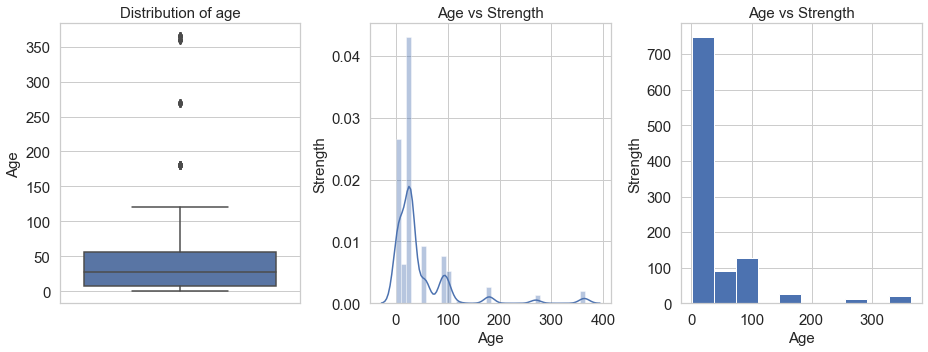

In [62]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='age',data=concrete_df,orient='v',ax=ax1)
ax1.set_ylabel('Age', fontsize=15)
ax1.set_title('Distribution of age', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(concrete_df['age'],ax=ax2)
ax2.set_xlabel('Age', fontsize=15)
ax2.set_ylabel('Strength', fontsize=15)
ax2.set_title('Age vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(concrete_df['age'])
ax3.set_xlabel('Age', fontsize=15)
ax3.set_ylabel('Strength', fontsize=15)
ax3.set_title('Age vs Strength', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

In [63]:
#### Multivariate Analysis

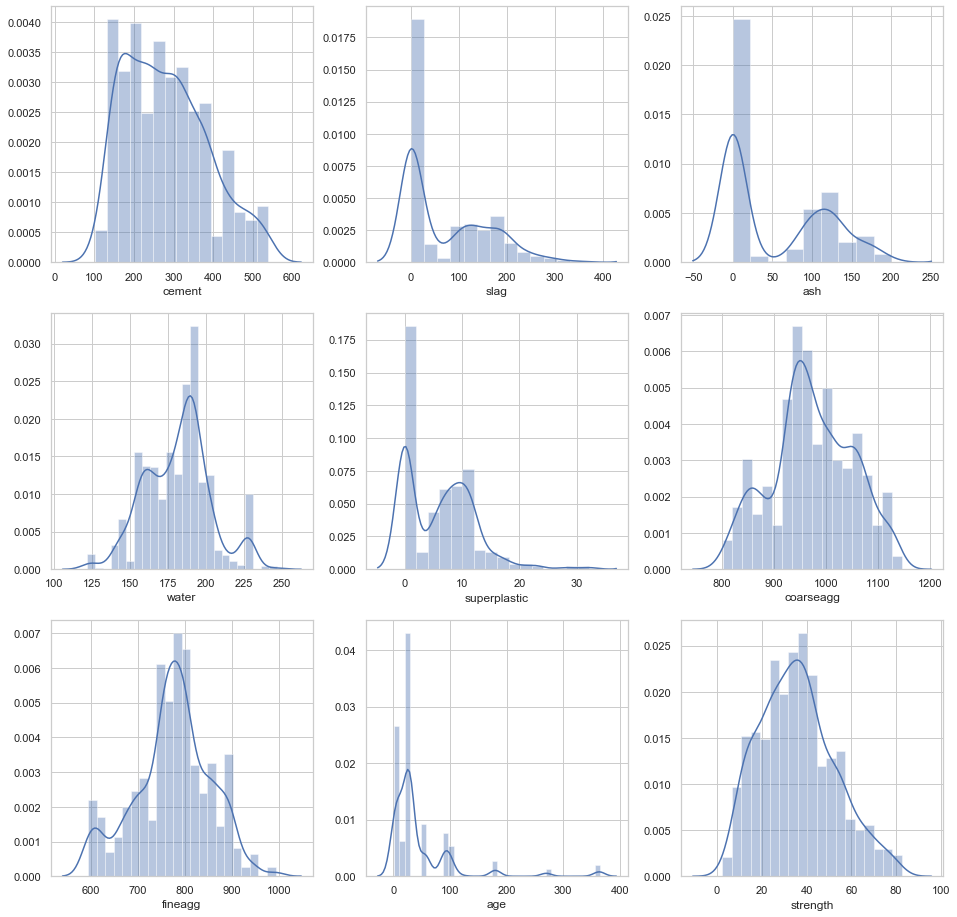

In [64]:
fig, ax2 = plt.subplots(3, 3, figsize=(16, 16))
sns.distplot(concrete_df['cement'],ax=ax2[0][0])
sns.distplot(concrete_df['slag'],ax=ax2[0][1])
sns.distplot(concrete_df['ash'],ax=ax2[0][2])
sns.distplot(concrete_df['water'],ax=ax2[1][0])
sns.distplot(concrete_df['superplastic'],ax=ax2[1][1])
sns.distplot(concrete_df['coarseagg'],ax=ax2[1][2])
sns.distplot(concrete_df['fineagg'],ax=ax2[2][0])
sns.distplot(concrete_df['age'],ax=ax2[2][1])
sns.distplot(concrete_df['strength'],ax=ax2[2][2])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a24c48d90>,
      dtype=object)

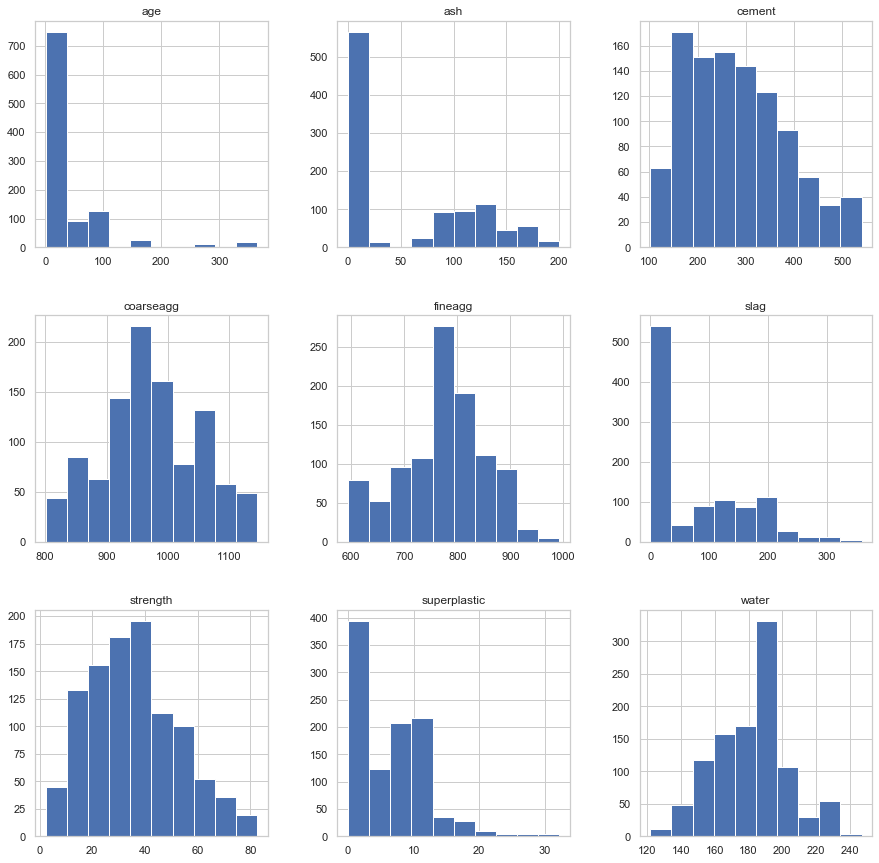

In [65]:
concrete_df.hist(figsize=(15,15))

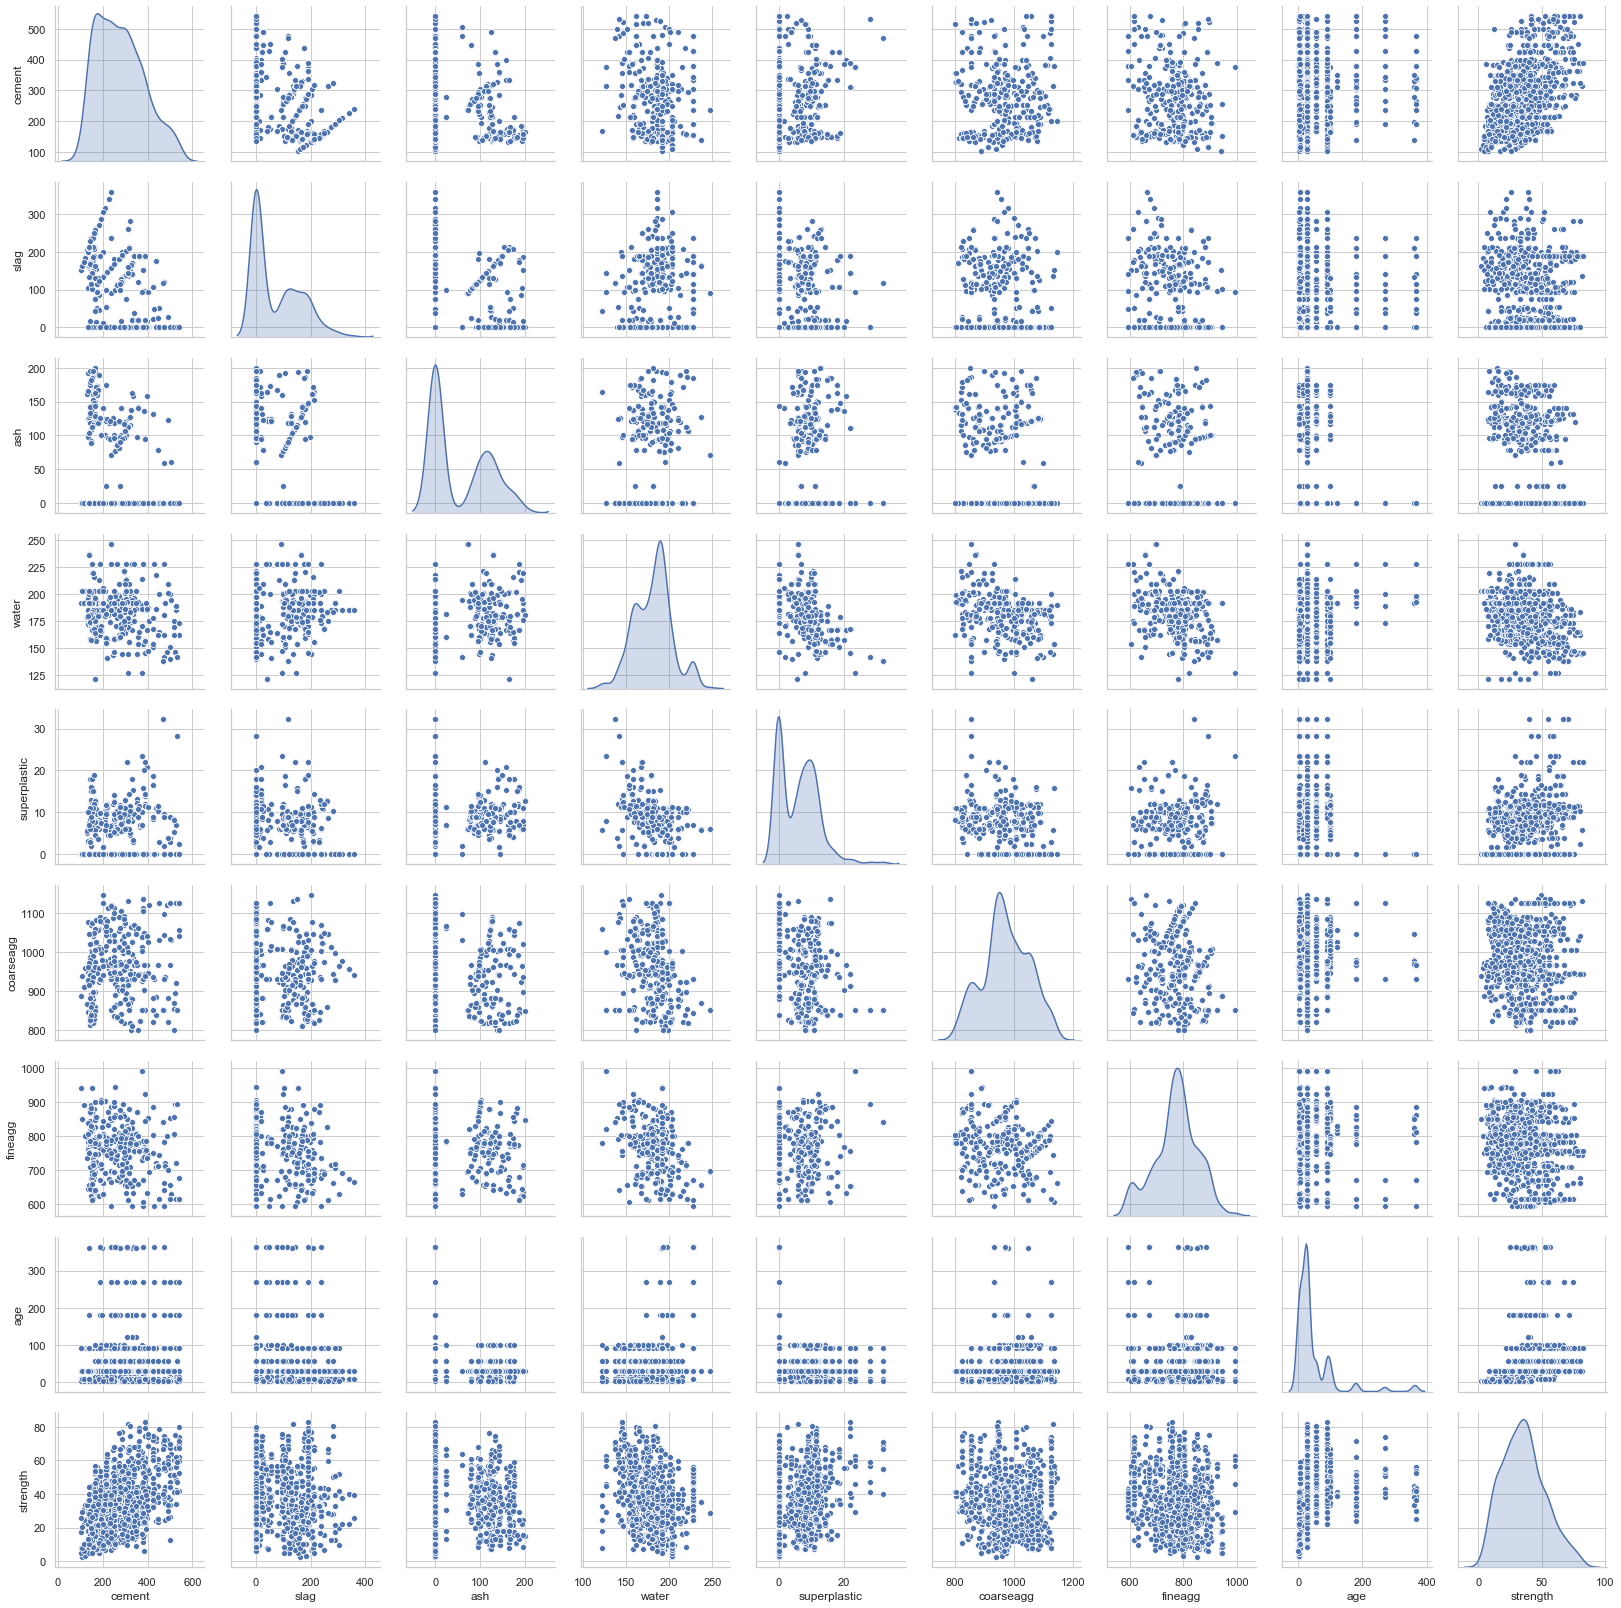

In [66]:
sns.pairplot(concrete_df, diag_kind='kde')  

In [67]:
## observation

# cement: almost normal
# slag has 3 gausssians, rightly skewed
# ash has 2 gaussians, rightly skewed
# water has 3 guassians, slighly left skewed
# superplastic has 2 gaussians, rightly skewed
# coarseagg has 3 guassians, almost normal
# fineagg has 2 guassians, looks like normal
# age has multiple guassians, rightly skewed



## we can see that none of the independent attributes are a good predictors of the strength attribute. 
#There is a no linear relationship between them.
# we can use linear model

In [68]:
cor=concrete_df.corr()
cor

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplastic,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseagg,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineagg,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


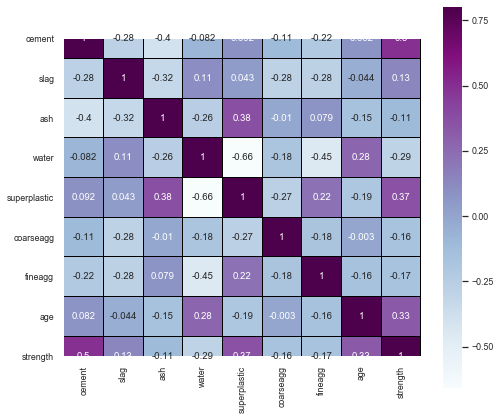

In [69]:
sns.set(font_scale=0.8)
plt.figure(figsize=(8, 7))

sns.heatmap(cor, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap="BuPu",linecolor="black")


In [70]:
## observation
# water shows significant negative relationship with superplastic and fineagg
#It also shows some kind of positive relationship with slag and age

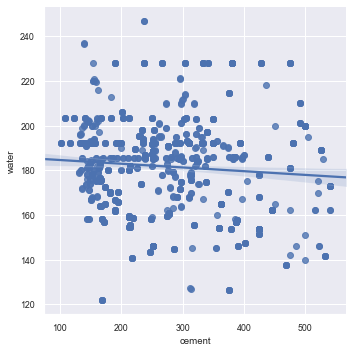

In [71]:
sns.lmplot(x="cement",y="water",data=concrete_df)
plt.show()

In [72]:
#Checking for missing values
concrete_df.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [73]:
## let's check for outliers

In [74]:
concrete_df1=concrete_df.copy()

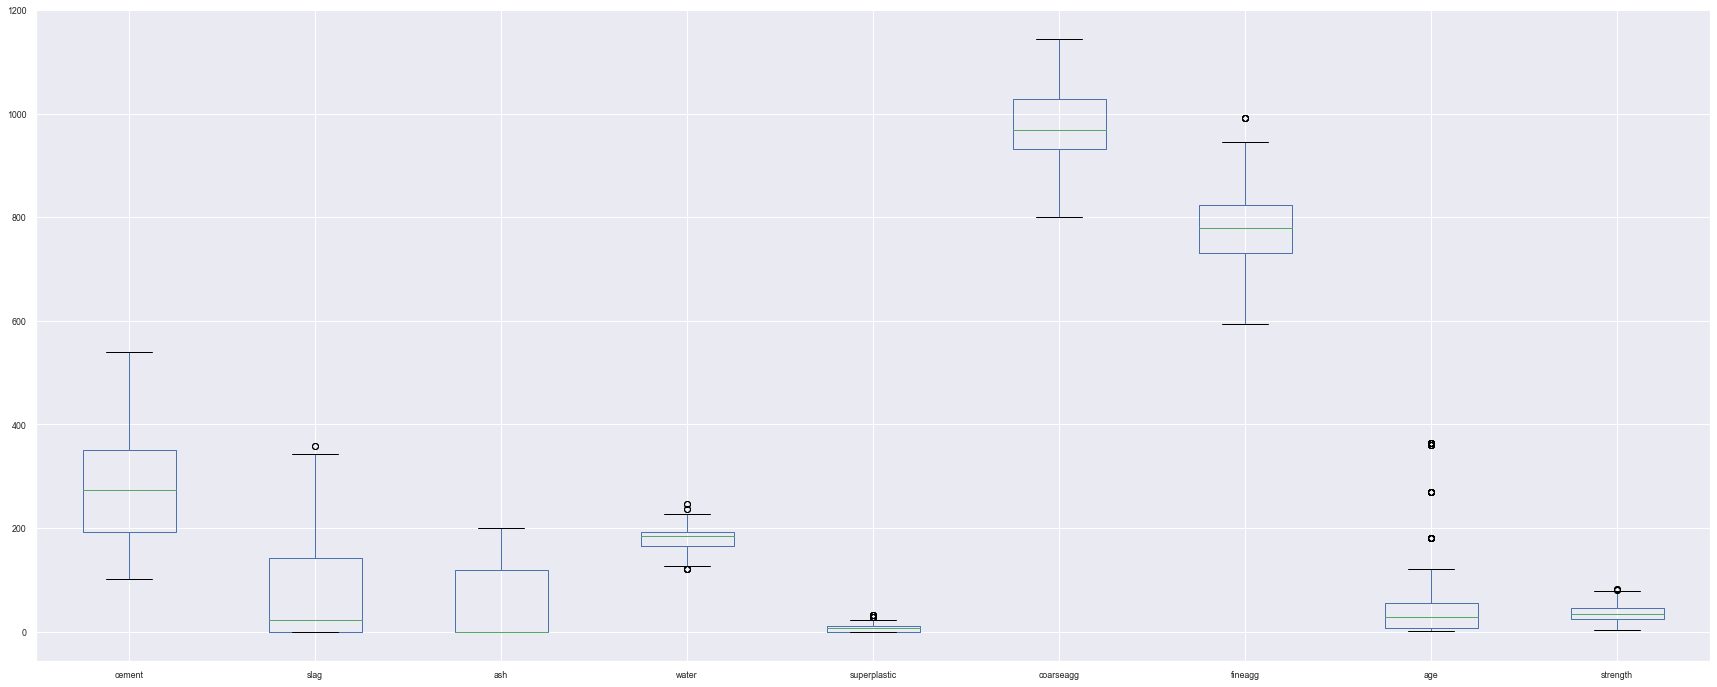

In [75]:
concrete_df1.boxplot(figsize=(30,12))

In [76]:
# slag, ash, water superplastic, and age contains outliers

In [77]:
from scipy.stats import iqr
Q1 = concrete_df1.quantile(0.25)
Q3 = concrete_df1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

cement          157.625
slag            142.950
ash             118.300
water            27.100
superplastic     10.200
coarseagg        97.400
fineagg          93.050
age              49.000
strength         22.425
dtype: float64


In [78]:
#slag, water, superplastic and age contain outliers

In [79]:
concrete_df1[~((concrete_df1 < (Q1 - 1.5 * IQR)) |(concrete_df1 > (Q3 + 1.5 * IQR))).any(axis=1)] # rows without outliers
concrete_df1.shape

(1030, 9)

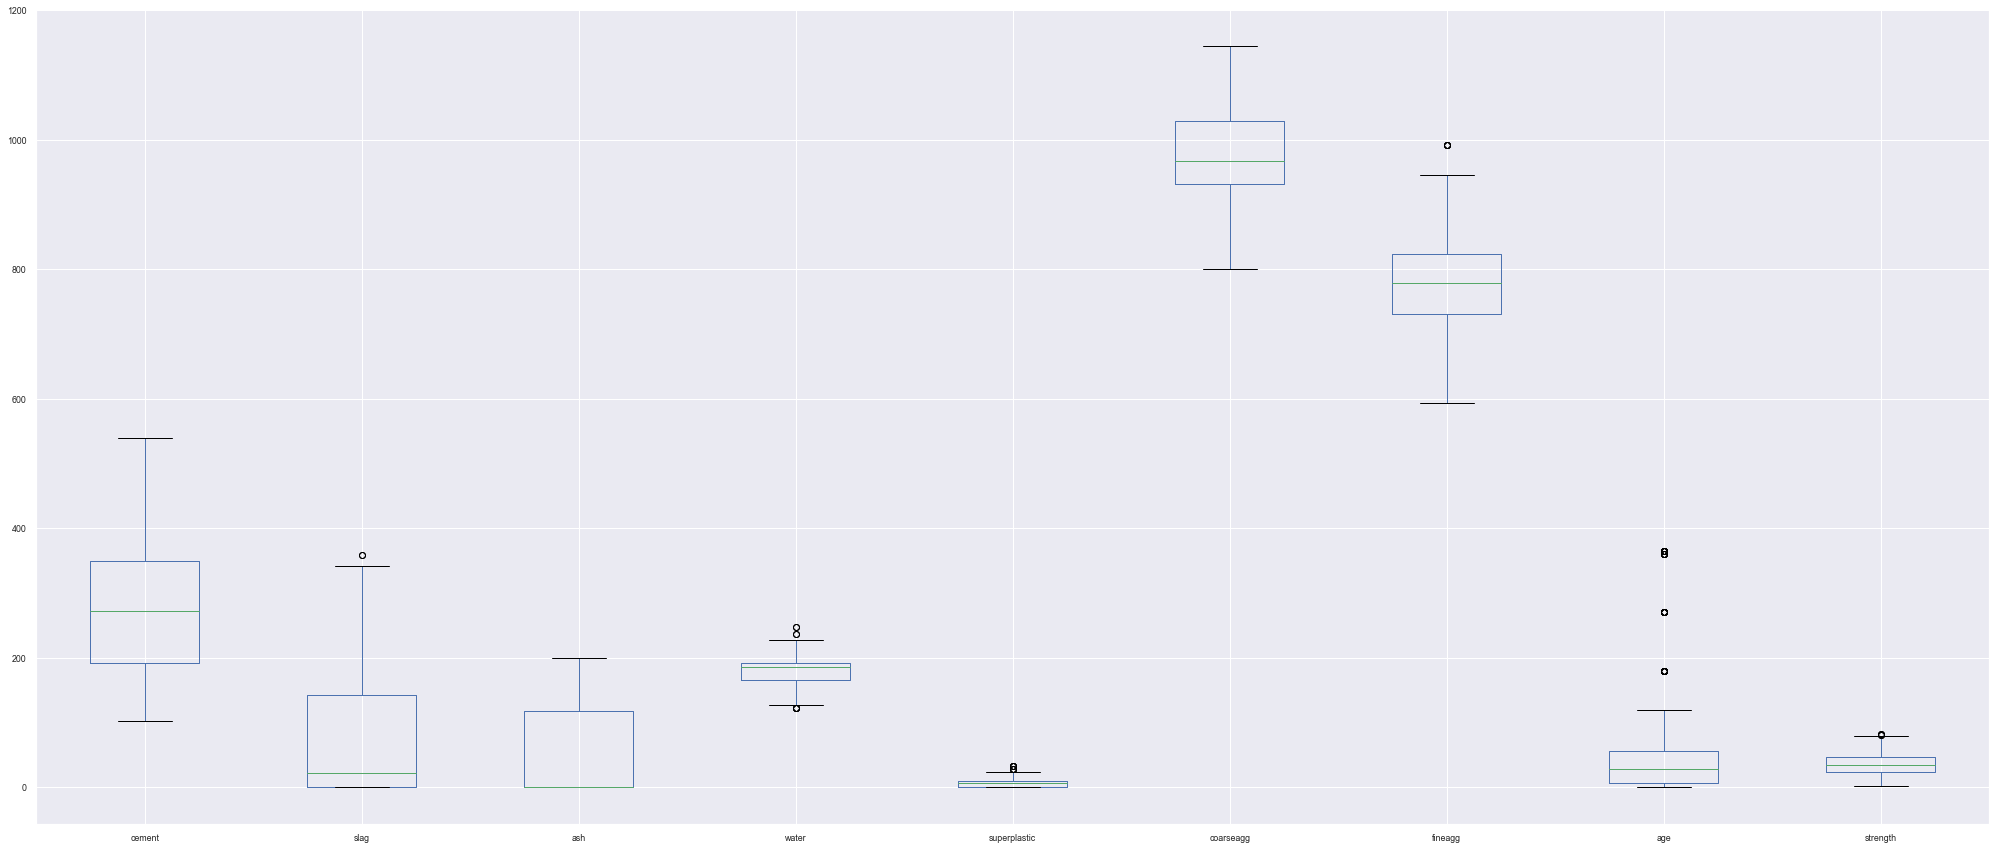

In [80]:
concrete_df1.boxplot(figsize=(35,15))

In [81]:
## Feature Engineering, Model Building and Model Tuning

In [82]:
#Scaling the dataset
concrete_df_z = concrete_df1.apply(zscore)
concrete_df_z=pd.DataFrame(concrete_df_z,columns=concrete_df.columns)

In [83]:
#independent and dependent variables
X=concrete_df_z.iloc[:,0:8]
y = concrete_df_z.iloc[:,8]

In [84]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

In [85]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train , y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [86]:
# feature importance
print('Feature importances: \n',pd.DataFrame(dt_model.feature_importances_,columns=['Imp'],index=X_train.columns))

Feature importances: 
                    Imp
cement        0.355935
slag          0.095998
ash           0.012301
water         0.120105
superplastic  0.016617
coarseagg     0.032626
fineagg       0.033067
age           0.333352


In [87]:
y_pred = dt_model.predict(X_test)
print('Performance on training data using DecisionTree:',dt_model.score(X_train,y_train))
print('Performance on testing data using DecisionTree:',dt_model.score(X_test,y_test))
acc_DT=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_DT)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using DecisionTree: 0.9948592395522299
Performance on testing data using DecisionTree: 0.8382024980194784
Accuracy DT:  0.8382024980194784
MSE:  0.1688939713768809


In [88]:
# overfitting in the model as the dataset is performing 99% accurately in trainnig data

/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


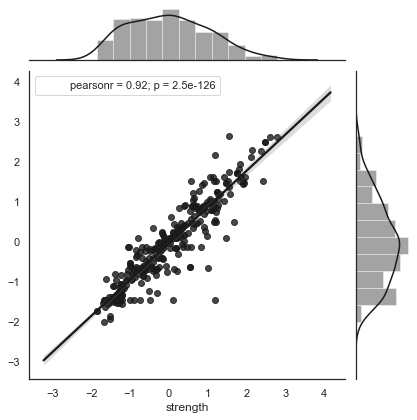

In [89]:
from scipy.stats import pearsonr
sns.set(style="darkgrid", color_codes=True)   
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, stat_func=pearsonr,kind="reg", color="k");

In [90]:
results = pd.DataFrame({'Method':['Decision Tree'], 'accuracy': acc_DT},index={'1'})
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.838202


In [91]:
## K fold cross validation

In [92]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(dt_model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.8646430476391611
Standard Deviation:  0.04572962006018947


In [93]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Decision Tree k fold'], 'accuracy': [accuracy]},index={'2'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.838202
2,Decision Tree k fold,0.864643


In [94]:
### Drop the least significant variable

In [95]:
concrete_df_z.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null float64
strength        1030 non-null float64
dtypes: float64(9)
memory usage: 72.5 KB


In [96]:
concrete_df2=concrete_df_z.copy()

In [97]:
X = concrete_df2.drop( ['strength','ash','coarseagg','fineagg'] , axis=1)
y = concrete_df2['strength']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

In [98]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train , y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [99]:
print('Feature importances: \n',pd.DataFrame(dt_model.feature_importances_,columns=['Imp'],index=X_train.columns))

Feature importances: 
                    Imp
cement        0.380837
slag          0.112049
water         0.139690
superplastic  0.030728
age           0.336697


In [100]:
y_pred = dt_model.predict(X_test)
print('Performance on training data using DecisionTree:',dt_model.score(X_train,y_train))
print('Performance on testing data using DecisionTree:',dt_model.score(X_test,y_test))
acc_DT=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_DT)

Performance on training data using DecisionTree: 0.994445772438993
Performance on testing data using DecisionTree: 0.8468092056553124
Accuracy DT:  0.8468092056553124


In [101]:
## again it is an overfit model

/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


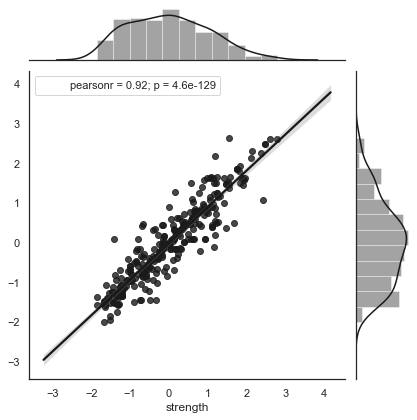

In [102]:
from scipy.stats import pearsonr
sns.set(style="darkgrid", color_codes=True)   
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, stat_func=pearsonr,kind="reg", color="k");

In [103]:
tempResultsDf = pd.DataFrame({'Method':['Decision Tree2'], 'accuracy': [acc_DT]},index={'3'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results


,Method,accuracy
1,Decision Tree,0.838202
2,Decision Tree k fold,0.864643
3,Decision Tree2,0.846809


In [104]:
## Regularising/Pruning of Decision Tree

In [105]:
X=concrete_df_z.iloc[:,0:8]
y = concrete_df_z.iloc[:,8]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

In [106]:
reg_dt_model = DecisionTreeRegressor( max_depth = 4,random_state=1,min_samples_leaf=5)
reg_dt_model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1, splitter='best')

In [107]:
print (pd.DataFrame(reg_dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

                   Imp
cement        0.418362
slag          0.025910
ash           0.000000
water         0.132203
superplastic  0.018048
coarseagg     0.000000
fineagg       0.007819
age           0.397658


In [108]:
# ash,coarseagg and fineagg are least significant

In [109]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
bank_df=concrete_df_z
xvar = bank_df.drop('strength', axis=1)
feature_cols = xvar.columns

/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [110]:
y_pred = reg_dt_model.predict(X_test)
print('Performance on training data using DT:',reg_dt_model.score(X_train,y_train))
print('Performance on testing data using DT:',reg_dt_model.score(X_test,y_test))
acc_RDT=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_RDT)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using DT: 0.7231360843074615
Performance on testing data using DT: 0.6546096957245569
Accuracy DT:  0.6546096957245569
MSE:  0.36053918911042043


In [111]:
tempResultsDf = pd.DataFrame({'Method':['Pruned Decision Tree'], 'accuracy': [acc_RDT]},index={'4'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.838202
2,Decision Tree k fold,0.864643
3,Decision Tree2,0.846809
4,Pruned Decision Tree,0.654610


In [112]:
## K fold cross validation

In [113]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(reg_dt_model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.6686697043785105
Standard Deviation:  0.05324156347664744


In [114]:
tempResultsDf = pd.DataFrame({'Method':['Pruned Decision Tree k fold'], 'accuracy': [accuracy]},index={'5'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.838202
2,Decision Tree k fold,0.864643
3,Decision Tree2,0.846809
4,Pruned Decision Tree,0.654610
5,Pruned Decision Tree k fold,0.668670


In [115]:
concrete_df3=concrete_df_z.copy()

In [116]:
X = concrete_df3.drop( ['strength','ash','coarseagg','fineagg'] , axis=1)
y = concrete_df3['strength']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

In [117]:
reg_dt_model = DecisionTreeRegressor( max_depth = 4,random_state=1,min_samples_leaf=5)
reg_dt_model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1, splitter='best')

In [118]:
y_pred = reg_dt_model.predict(X_test)
print('Performance on training data using DT:',reg_dt_model.score(X_train,y_train))
print('Performance on testing data using DT:',reg_dt_model.score(X_test,y_test))
acc_RDT=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_RDT)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using DT: 0.7225133406860064
Performance on testing data using DT: 0.6632496804899377
Accuracy DT:  0.6632496804899377
MSE:  0.3515202529599933


In [119]:
tempResultsDf = pd.DataFrame({'Method':['Pruned Decision Tree2'], 'accuracy': [acc_RDT]},index={'6'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.838202
2,Decision Tree k fold,0.864643
3,Decision Tree2,0.846809
4,Pruned Decision Tree,0.654610
5,Pruned Decision Tree k fold,0.668670
6,Pruned Decision Tree2,0.663250


In [120]:
## K Means Clustering

In [121]:
cluster_range = range( 1, 15 )  
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(concrete_df1)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,4.084759e+07
1,2,3.147316e+07
2,3,2.499599e+07
3,4,2.214146e+07
4,5,1.953573e+07
5,6,1.767808e+07
6,7,1.629733e+07
7,8,1.475650e+07
8,9,1.340459e+07
9,10,1.227731e+07


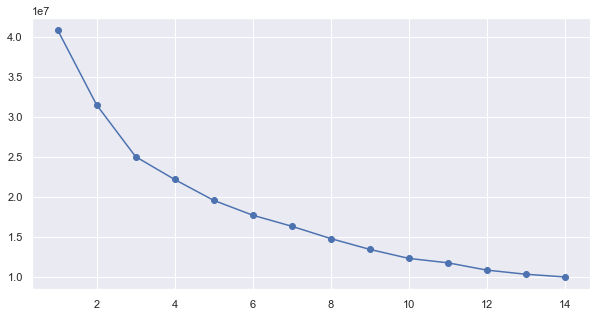

In [122]:
plt.figure(figsize=(10,5))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [123]:
cluster = KMeans( n_clusters = 6, random_state = 2354 )
cluster.fit(concrete_df_z)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2354, tol=0.0001, verbose=0)

In [124]:
prediction=cluster.predict(concrete_df_z)
concrete_df_z["GROUP"] = prediction     
concrete_df_z_copy = concrete_df_z.copy(deep = True)  

In [125]:
centroids = cluster.cluster_centers_
centroids

array([[-0.60481291, -0.64376041,  1.09644224, -0.60567783,  0.38898057,
         0.601929  ,  0.41490501, -0.11164583, -0.17403821],
       [ 0.67402511, -0.83219405, -0.83750473,  0.45771995, -0.99879195,
         0.62910218, -0.02819223, -0.24493873, -0.45270502],
       [-0.81190107,  1.3869915 , -0.83818448,  0.53323353, -0.6868518 ,
        -0.01579727, -0.21113413, -0.27612094, -0.57260335],
       [ 1.02875383,  0.45936838, -0.50838886, -0.98416668,  1.12202966,
        -0.62700513,  0.23431342, -0.17615755,  1.20631296],
       [-0.40042252,  0.19292672,  1.10011953,  0.58891697,  0.40811346,
        -1.2039871 , -0.37495631, -0.29897336, -0.21500711],
       [ 0.58910483, -0.15585189, -0.84714393,  1.523253  , -1.03914281,
        -0.08906903, -1.0774539 ,  3.16340032,  0.5535986 ]])

In [126]:
centroid_df = pd.DataFrame(centroids, columns = list(concrete_df1) )
centroid_df

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,-0.604813,-0.643760,1.096442,-0.605678,0.388981,0.601929,0.414905,-0.111646,-0.174038
1,0.674025,-0.832194,-0.837505,0.457720,-0.998792,0.629102,-0.028192,-0.244939,-0.452705
2,-0.811901,1.386991,-0.838184,0.533234,-0.686852,-0.015797,-0.211134,-0.276121,-0.572603
3,1.028754,0.459368,-0.508389,-0.984167,1.122030,-0.627005,0.234313,-0.176158,1.206313
4,-0.400423,0.192927,1.100120,0.588917,0.408113,-1.203987,-0.374956,-0.298973,-0.215007
5,0.589105,-0.155852,-0.847144,1.523253,-1.039143,-0.089069,-1.077454,3.163400,0.553599


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a292aa990>,
      dtype=object)

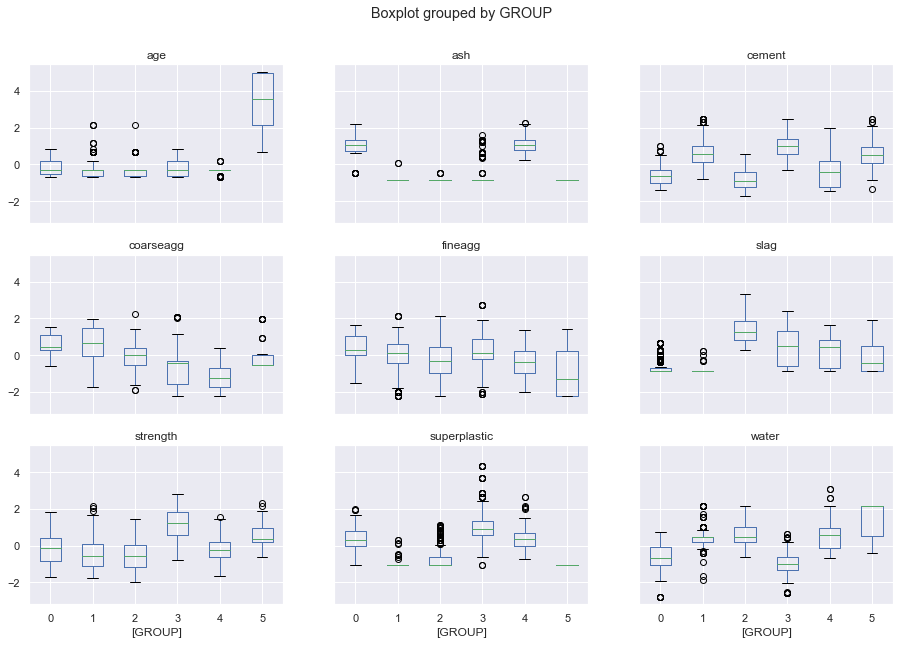

In [127]:
import matplotlib.pylab as plt
concrete_df_z.boxplot(by = 'GROUP',  layout=(3,3), figsize=(15, 10))

In [128]:
## cluster are overlapping
##  there are clusters in datasets on different dimensions
## no good predictor of target variable

In [129]:
X=concrete_df_z.iloc[:,0:8]
y = concrete_df_z.iloc[:,8]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

In [130]:
## RandomForestRegressor

model=RandomForestRegressor()
model.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [131]:
y_pred = model.predict(X_test)
print('Performance on training data using RFR:',model.score(X_train,y_train))
print('Performance on testing data using RFR:',model.score(X_test,y_test))
acc_RFR=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_RFR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using RFR: 0.976273389554472
Performance on testing data using RFR: 0.898887779959009
Accuracy DT:  0.898887779959009
MSE:  0.10554702135952572


In [132]:
### again overfit

In [133]:
tempResultsDf = pd.DataFrame({'Method':['Random Forest Regressor'], 'accuracy': [acc_RFR]},index={'7'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.838202
2,Decision Tree k fold,0.864643
3,Decision Tree2,0.846809
4,Pruned Decision Tree,0.654610
5,Pruned Decision Tree k fold,0.668670
6,Pruned Decision Tree2,0.663250
7,Random Forest Regressor,0.898888


In [134]:
## K fold cross validation

In [135]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.9060712420077746
Standard Deviation:  0.024298643123515058


In [136]:
tempResultsDf = pd.DataFrame({'Method':['Random Forest Regressor k fold'], 'accuracy': [accuracy]},index={'8'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.838202
2,Decision Tree k fold,0.864643
3,Decision Tree2,0.846809
4,Pruned Decision Tree,0.654610
5,Pruned Decision Tree k fold,0.668670
6,Pruned Decision Tree2,0.663250
7,Random Forest Regressor,0.898888
8,Random Forest Regressor k fold,0.906071


In [137]:
## Gradient Boosting Regressor

In [138]:
model=GradientBoostingRegressor()
model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [139]:
y_pred = model.predict(X_test)
print('Performance on training data using GBR:',model.score(X_train,y_train))
print('Performance on testing data using GBR:',model.score(X_test,y_test))
acc_GBR=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_GBR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using GBR: 0.9503239654196514
Performance on testing data using GBR: 0.903550093579128
Accuracy DT:  0.903550093579128
MSE:  0.10068021777190789


In [140]:
tempResultsDf = pd.DataFrame({'Method':['Gradient Boost Regressor'], 'accuracy': [acc_GBR]},index={'9'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.838202
2,Decision Tree k fold,0.864643
3,Decision Tree2,0.846809
4,Pruned Decision Tree,0.654610
5,Pruned Decision Tree k fold,0.668670
6,Pruned Decision Tree2,0.663250
7,Random Forest Regressor,0.898888
8,Random Forest Regressor k fold,0.906071
9,Gradient Boost Regressor,0.903550


In [141]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.9059996294583265
Standard Deviation:  0.019994456863208172


In [142]:
tempResultsDf = pd.DataFrame({'Method':['Gradient Boost Regressor k fold'], 'accuracy': [accuracy]},index={'10'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.838202
2,Decision Tree k fold,0.864643
3,Decision Tree2,0.846809
4,Pruned Decision Tree,0.654610
5,Pruned Decision Tree k fold,0.668670
6,Pruned Decision Tree2,0.663250
7,Random Forest Regressor,0.898888
8,Random Forest Regressor k fold,0.906071
9,Gradient Boost Regressor,0.903550
10,Gradient Boost Regressor k fold,0.906000


In [143]:
##Ada Boosting Regressor

In [144]:
model=AdaBoostRegressor()
model.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)

In [145]:
y_pred = model.predict(X_test)
print('Performance on training data using GBR:',model.score(X_train,y_train))
print('Performance on testing data using GBR:',model.score(X_test,y_test))
acc_ABR=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_ABR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using GBR: 0.8178157441424577
Performance on testing data using GBR: 0.7681583820386158
Accuracy DT:  0.7681583820386158
MSE:  0.24201023568740745


In [146]:
tempResultsDf = pd.DataFrame({'Method':['Ada Boosting Regressor'], 'accuracy': [acc_ABR]},index={'11'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.838202
2,Decision Tree k fold,0.864643
3,Decision Tree2,0.846809
4,Pruned Decision Tree,0.654610
5,Pruned Decision Tree k fold,0.668670
6,Pruned Decision Tree2,0.663250
7,Random Forest Regressor,0.898888
8,Random Forest Regressor k fold,0.906071
9,Gradient Boost Regressor,0.903550
10,Gradient Boost Regressor k fold,0.906000


In [147]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.7880026021999968
Standard Deviation:  0.02725218462947711


In [148]:
tempResultsDf = pd.DataFrame({'Method':['Ada Boosting Regressor k fold'], 'accuracy': [accuracy]},index={'12'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.838202
2,Decision Tree k fold,0.864643
3,Decision Tree2,0.846809
4,Pruned Decision Tree,0.654610
5,Pruned Decision Tree k fold,0.668670
6,Pruned Decision Tree2,0.663250
7,Random Forest Regressor,0.898888
8,Random Forest Regressor k fold,0.906071
9,Gradient Boost Regressor,0.903550
10,Gradient Boost Regressor k fold,0.906000


In [149]:
## Bagging Regressor

In [150]:
model=BaggingRegressor()
model.fit(X_train, y_train)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=None, verbose=0,
                 warm_start=False)

In [151]:
y_pred = model.predict(X_test)
print('Performance on training data using GBR:',model.score(X_train,y_train))
print('Performance on testing data using GBR:',model.score(X_test,y_test))
acc_BR=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_BR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using GBR: 0.9744308116816969
Performance on testing data using GBR: 0.892905520642418
Accuracy DT:  0.8929055206424181
MSE:  0.11179166371443063


In [152]:
tempResultsDf = pd.DataFrame({'Method':['Bagging Regressor'], 'accuracy': [acc_BR]},index={'13'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.838202
2,Decision Tree k fold,0.864643
3,Decision Tree2,0.846809
4,Pruned Decision Tree,0.654610
5,Pruned Decision Tree k fold,0.668670
6,Pruned Decision Tree2,0.663250
7,Random Forest Regressor,0.898888
8,Random Forest Regressor k fold,0.906071
9,Gradient Boost Regressor,0.903550
10,Gradient Boost Regressor k fold,0.906000


In [153]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.9006034338837738
Standard Deviation:  0.03178743579916253


In [154]:
tempResultsDf = pd.DataFrame({'Method':['Bagging Regressor k fold'], 'accuracy': [accuracy]},index={'14'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.838202
2,Decision Tree k fold,0.864643
3,Decision Tree2,0.846809
4,Pruned Decision Tree,0.654610
5,Pruned Decision Tree k fold,0.668670
6,Pruned Decision Tree2,0.663250
7,Random Forest Regressor,0.898888
8,Random Forest Regressor k fold,0.906071
9,Gradient Boost Regressor,0.903550
10,Gradient Boost Regressor k fold,0.906000


In [155]:
# KNN 

In [156]:
error=[]
for i in range(1,30):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i!=y_test))
    

Text(0, 0.5, 'Mean error')

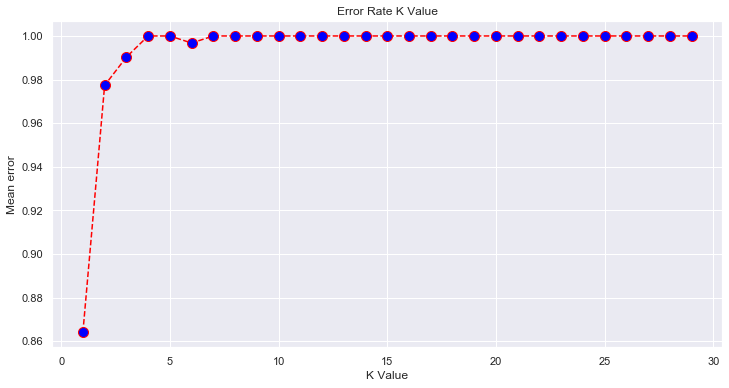

In [157]:
plt.figure(figsize=(12,6))
plt.plot(range(1,30),error,color='red', linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean error')

In [158]:
model = KNeighborsRegressor(n_neighbors=3)
model.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [159]:
y_pred = model.predict(X_test)
print('Performance on training data using KNNR:',model.score(X_train,y_train))
print('Performance on testing data using KNNR:',model.score(X_test,y_test))
acc_K=metrics.r2_score(y_test, y_pred)
print('Accuracy KNNR: ',acc_K)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using KNNR: 0.8506796814958459
Performance on testing data using KNNR: 0.7173366160591557
Accuracy KNNR:  0.7173366160591557
MSE:  0.2950610540473277


In [160]:
tempResultsDf = pd.DataFrame({'Method':['KNN Regressor'], 'accuracy': [acc_K]},index={'15'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.838202
2,Decision Tree k fold,0.864643
3,Decision Tree2,0.846809
4,Pruned Decision Tree,0.654610
5,Pruned Decision Tree k fold,0.668670
6,Pruned Decision Tree2,0.663250
7,Random Forest Regressor,0.898888
8,Random Forest Regressor k fold,0.906071
9,Gradient Boost Regressor,0.903550
10,Gradient Boost Regressor k fold,0.906000


In [161]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.7212837263350769
Standard Deviation:  0.04811430303753489


In [162]:
tempResultsDf = pd.DataFrame({'Method':['KNN Regressor k fold'], 'accuracy': [accuracy]},index={'16'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.838202
2,Decision Tree k fold,0.864643
3,Decision Tree2,0.846809
4,Pruned Decision Tree,0.654610
5,Pruned Decision Tree k fold,0.668670
6,Pruned Decision Tree2,0.663250
7,Random Forest Regressor,0.898888
8,Random Forest Regressor k fold,0.906071
9,Gradient Boost Regressor,0.903550
10,Gradient Boost Regressor k fold,0.906000


In [163]:
## SVR

In [164]:
model = SVR(kernel='linear')
model.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [165]:
y_pred = model.predict(X_test)
print('Performance on training data using SVR:',model.score(X_train,y_train))
print('Performance on testing data using SVR:',model.score(X_test,y_test))
acc_S=metrics.r2_score(y_test, y_pred)
print('Accuracy SVR: ',acc_S)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using SVR: 0.583043442149739
Performance on testing data using SVR: 0.6282036485176911
Accuracy SVR:  0.6282036485176911
MSE:  0.3881034106005017


In [166]:
tempResultsDf = pd.DataFrame({'Method':['SVR'], 'accuracy': [acc_S]},index={'17'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.838202
2,Decision Tree k fold,0.864643
3,Decision Tree2,0.846809
4,Pruned Decision Tree,0.654610
5,Pruned Decision Tree k fold,0.668670
6,Pruned Decision Tree2,0.663250
7,Random Forest Regressor,0.898888
8,Random Forest Regressor k fold,0.906071
9,Gradient Boost Regressor,0.903550
10,Gradient Boost Regressor k fold,0.906000


In [167]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.5634657846039652
Standard Deviation:  0.08154968292744046


In [168]:
tempResultsDf = pd.DataFrame({'Method':['SVR k fold'], 'accuracy': [accuracy]},index={'18'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.838202
2,Decision Tree k fold,0.864643
3,Decision Tree2,0.846809
4,Pruned Decision Tree,0.654610
5,Pruned Decision Tree k fold,0.668670
6,Pruned Decision Tree2,0.663250
7,Random Forest Regressor,0.898888
8,Random Forest Regressor k fold,0.906071
9,Gradient Boost Regressor,0.903550
10,Gradient Boost Regressor k fold,0.906000


In [169]:
## Ensemeble KNN Regressor, SVR, LR

In [170]:
from sklearn import svm
LR=LinearRegression()
KN=KNeighborsRegressor(n_neighbors=3)
SVM=svm.SVR(kernel='linear') 

In [171]:
evc=VotingRegressor(estimators=[('LR',LR),('KN',KN),('SVM',SVM)])
evc.fit(X_train, y_train)

VotingRegressor(estimators=[('LR',
                             LinearRegression(copy_X=True, fit_intercept=True,
                                              n_jobs=None, normalize=False)),
                            ('KN',
                             KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                                 metric='minkowski',
                                                 metric_params=None,
                                                 n_jobs=None, n_neighbors=3,
                                                 p=2, weights='uniform')),
                            ('SVM',
                             SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='auto_deprecated',
                                 kernel='linear', max_iter=-1, shrinking=True,
                                 tol=0.001, verbose=False))],
                n_jobs=None, weights=None)

In [172]:
y_pred = evc.predict(X_test)
print('Performance on training data using ensemble:',evc.score(X_train,y_train))
print('Performance on testing data using ensemble:',evc.score(X_test,y_test))
acc_E=metrics.r2_score(y_test, y_pred)
print('Accuracy ensemble: ',acc_E)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using ensemble: 0.7443595272684727
Performance on testing data using ensemble: 0.7117487436276424
Accuracy ensemble:  0.7117487436276424
MSE:  0.3008940116329106


In [173]:
tempResultsDf = pd.DataFrame({'Method':['Ensemble'], 'accuracy': [acc_E]},index={'19'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.838202
2,Decision Tree k fold,0.864643
3,Decision Tree2,0.846809
4,Pruned Decision Tree,0.654610
5,Pruned Decision Tree k fold,0.668670
6,Pruned Decision Tree2,0.663250
7,Random Forest Regressor,0.898888
8,Random Forest Regressor k fold,0.906071
9,Gradient Boost Regressor,0.903550
10,Gradient Boost Regressor k fold,0.906000


In [174]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(evc,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.6930841071838953
Standard Deviation:  0.057219382896364385


In [175]:
tempResultsDf = pd.DataFrame({'Method':['Ensemble k fold'], 'accuracy': [accuracy]},index={'20'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.838202
2,Decision Tree k fold,0.864643
3,Decision Tree2,0.846809
4,Pruned Decision Tree,0.654610
5,Pruned Decision Tree k fold,0.668670
6,Pruned Decision Tree2,0.663250
7,Random Forest Regressor,0.898888
8,Random Forest Regressor k fold,0.906071
9,Gradient Boost Regressor,0.903550
10,Gradient Boost Regressor k fold,0.906000


In [176]:
## bootstrap sampling

In [177]:
## changing it to use in bootrap sampling as I was getting error ValueError: Unknown label type: 'continuous'
data = concrete_df_z.round(0).astype(int)

In [178]:
## gradient booster regression
values = data.values

In [179]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# configure bootstrap
n_iterations = 1000              # Number of bootstrap samples to create
n_size = int(len(data) * 0.50)    # picking only 50 % of the given data in every bootstrap sample

# run bootstrap
stats = list()
for i in range(n_iterations):
	# prepare train and test sets
	train = resample(values, n_samples=n_size)
    # Sampling with replacement 
	test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    # fit model
	model = DecisionTreeClassifier()
	model.fit(train[:,:-1], train[:,-1])
    # evaluate model
	predictions = model.predict(test[:,:-1])
	score = accuracy_score(test[:,-1], predictions)    # caution, overall accuracy score can mislead when classes are imbalanced
	print(score)
	stats.append(score)


0.8865435356200527
0.9132653061224489
0.8753315649867374
0.907928388746803
0.8737373737373737
0.9166666666666666
0.9125964010282777
0.8952879581151832
0.910025706940874
0.8944723618090452
0.9228723404255319
0.9069212410501193
0.898989898989899
0.8922305764411027
0.8841309823677582
0.9252577319587629
0.9010416666666666
0.8717948717948718
0.9135802469135802
0.9037037037037037
0.9180722891566265
0.865979381443299
0.8826530612244898
0.8994974874371859
0.910025706940874
0.8877284595300261
0.8793969849246231
0.8817733990147784
0.9153846153846154
0.9378109452736318
0.8990384615384616
0.9132791327913279
0.9157894736842105
0.9005102040816326
0.8830845771144279
0.865979381443299
0.8958904109589041
0.8962765957446809
0.919889502762431
0.9051282051282051
0.9193954659949622
0.8788659793814433
0.9093333333333333
0.8770491803278688
0.8801089918256131
0.9034653465346535
0.9113924050632911
0.8943298969072165
0.8959390862944162
0.9130434782608695
0.9010416666666666
0.8800959232613909
0.8721804511278195


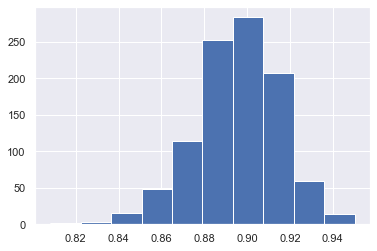

95.0 confidence interval 85.4% and 93.0%


In [180]:
from matplotlib import pyplot

# plot scores
pyplot.hist(stats)
pyplot.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

In [181]:
# The bootstrap DecisionTreeClassifier model performance is between 
# 85.4%-93% which is better than other classification algorithms.